In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier


C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print("Reading dataset.")
DR_data = pd.read_csv("optdigits_raining.csv")
data_clean = DR_data.dropna()
print(data_clean.shape)

predictors = data_clean[data_clean.columns[0:64]]
targets = data_clean[data_clean.columns[64:65]]
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

classifier = MLPClassifier(hidden_layer_sizes=(35),solver='sgd',learning_rate_init=0.001,max_iter=1000)
classifier = classifier.fit(pred_train, tar_train)
predictions = classifier.predict(pred_test)
print("Training Accuracy: %f" % classifier.score(pred_test, tar_test))
print("Training set loss: %f" % classifier.loss_)

Reading dataset.
(3822, 65)


C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.968607
Training set loss: 0.024755


C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***************************************************************
Testing Accuracy: 0.943764
Testing set loss: 0.039774
Execution completed.


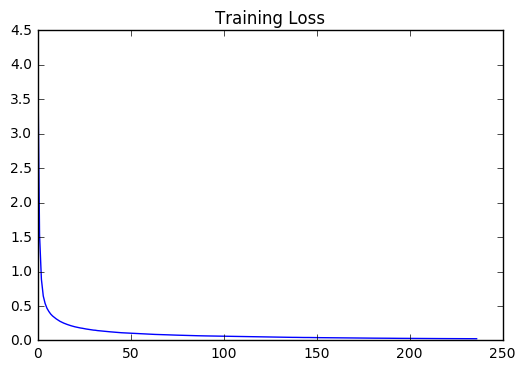

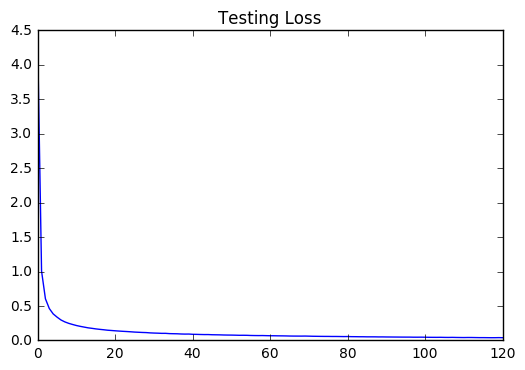

In [3]:
test_data = pd.read_csv("optdigits_test.csv")
test_data_clean = test_data.dropna()

X_train = data_clean[data_clean.columns[0:64]]
Y_train = data_clean[data_clean.columns[64:65]]

X_test = test_data_clean[test_data_clean.columns[0:64]]
Y_test = test_data_clean[test_data_clean.columns[64:65]]

new_classifier = MLPClassifier(hidden_layer_sizes=(35),solver='sgd',learning_rate_init=0.001,max_iter=1000)
new_classifier = new_classifier.fit(X_train, Y_train)
print("***************************************************************")
new_predictions = new_classifier.predict(X_test)
print("Testing Accuracy: %f"  % classifier.score(X_test, Y_test))
print("Testing set loss: %f" % new_classifier.loss_)

print("Execution completed.")


plt.title("Training Loss")
plt.plot(classifier.loss_curve_)
plt.show()

plt.title("Testing Loss")
plt.plot(new_classifier.loss_curve_)
plt.show()
